In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import toolbox as tb

In [2]:
np.random.seed(43)
A = np.random.normal(1,1, size=(2,2))
Sigma = A.T@A
X = np.random.multivariate_normal([4,7], Sigma, size=100)

# SVD

Does it depend on mean?

In [35]:
U,S,V = np.linalg.svd(X, full_matrices=False)
U2,S2,V2 = np.linalg.svd(tb.demean(X), full_matrices=False)
S, S2

(array([16.18679079,  3.29010999]), array([16.18679079,  3.29010999]))

YES. I will work with demeaned data (for easier PCA, correlation intepretation)

In [5]:
X = tb.demean(X)
U,S,V = np.linalg.svd(X, full_matrices=False)

In [6]:
print(f"U shape: {U.shape}")
print(f"S shape: {S.shape}")
print(f"V shape: {V.shape}")

U shape: (100, 2)
S shape: (2,)
V shape: (2, 2)


Note that to put together again it is $USV$ instead of $USV^T$ -  this is simply numpy naming convention

In [7]:
assert np.allclose(U@np.diag(S)@V,X)

$ U^TU = I $ and $ V^TV = I $

In [8]:
assert np.allclose(U.T@U, np.eye(U.shape[1]))
assert np.allclose(V.T@V, np.eye(V.shape[1]))

Peculiar structure of $V$

In [9]:
np.allclose(V@V.T, np.eye(V.shape[0]))

True

In [10]:
V

array([[ 0.97634652,  0.21621165],
       [ 0.21621165, -0.97634652]])

In [11]:
V.T

array([[ 0.97634652,  0.21621165],
       [ 0.21621165, -0.97634652]])

### Relate to Gram Matrix (XTX)

In [12]:
G = X.T@X

$ (X^TX)V = VS^2 $

In [13]:
assert np.allclose(G@V.T, V.T@np.diag(S**2))

In [14]:
eig_values, eig_vectors = np.linalg.eig(G)
assert np.allclose(S,np.sort(np.sqrt(eig_values))[::-1])

In [15]:
eig_values

array([262.01219607,  10.82482376])

In [16]:
(G@(V.T[:,0]))/V.T[:,0]

array([262.01219607, 262.01219607])

In [17]:
(G@(V.T[:,1]))/V.T[:,1]

array([10.82482376, 10.82482376])

In [18]:
H = X@X.T

$ (XX^T)U = US^2 $

In [19]:
assert np.allclose(H@U, U@np.diag(S**2))

In [20]:
eig_values, eig_vectors = np.linalg.eig(H)
assert np.allclose(S, np.sort(np.sqrt(np.real(eig_values).round(10))[0:2])[::-1])

## Interpretation of SVD


* V's are eigenvectors of Gram matrix
    - hence principal components (see PCA)
* This allows us the interpretation that each row is a vector in $R^p$, Gramm matrix is correlation matrix (since demeaned), and we are finding linear orthognal basis of $R^p$ that "best expresses" the variance in the data.
* Can we interpret Gramm matrix without using correlation? Something about inner relative inner product of data vectors? This being a measure of spread?

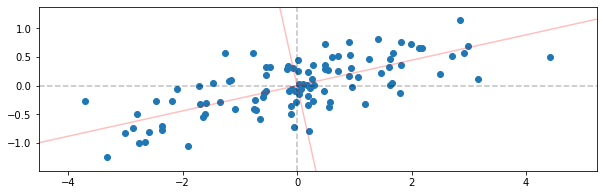

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
tb.scatter_points(ax, X, show_origin=True, equal_scale=True)
tb.plot_infinite_line(ax, (0,0), V.T[:,0])
tb.plot_infinite_line(ax, (0,0), V.T[:,1])

NOTE

* $ X : R^p \to R^n$ 
let $v_i$ be cols of $V$, and $u_i$ be cols of $U$, and $\sigma_i$ the ith diagonal element of $\Sigma$
* $X(v_i) = \sigma_i u_i$  (or zero)

In [32]:
X@(V.T[:,0])/U[:,0]

array([16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18679079,
       16.18679079, 16.18679079, 16.18679079, 16.18679079, 16.18

This is saying that the $U$s are the map of the $X$s, to the $V$ coordinates!

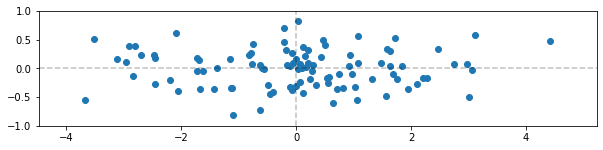

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
tb.scatter_points(ax, U@np.diag(S), show_origin=True, equal_scale=True)

There is a rotation and a reflection in the map above

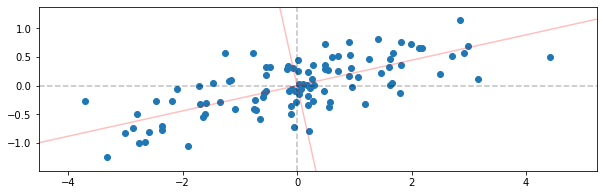

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
tb.scatter_points(ax, X, show_origin=True, equal_scale=True)
tb.plot_infinite_line(ax, (0,0), V.T[:,0])
tb.plot_infinite_line(ax, (0,0), V.T[:,1])